<a href="https://colab.research.google.com/github/Hsiaothereal/ML_Dataset/blob/main/st4_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 將 Google Drive 掛載到 Colab 目錄下
from google.colab import drive
drive.mount('/drive' , force_remount=True)

Mounted at /drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [6]:
base_path = "/drive/MyDrive/Colab_Notebooks/dataset-resized2/dataset-resized2"
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./225, shear_range=0.1, zoom_range=0.1,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,
    vertical_flip=True, validation_split=0.1)

test_datagen = ImageDataGenerator(
    rescale=1./255, validation_split=0.1)
    
train_generator = train_datagen.flow_from_directory(
    base_path, target_size=(300, 300), batch_size=25,
    class_mode='categorical', subset='training', seed=0)

validation_generator = test_datagen.flow_from_directory(
    base_path, target_size=(300, 300), batch_size=25,
    class_mode='categorical', subset='validation', seed=0)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 1535 images belonging to 4 classes.
Found 170 images belonging to 4 classes.
{0: 'bottle', 1: 'glass', 2: 'metal', 3: 'paper'}


In [12]:
#model_1
#範例模型
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(4, activation='softmax')
])

In [ ]:
#model_2
#測試
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [13]:
# Summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 32)       

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit_generator(train_generator, epochs=20, steps_per_epoch=1535//32,validation_data=validation_generator,
                    validation_steps=170//32)

Epoch 1/20
47/47 [==============================] - 505s 11s/step - loss: 1.3291 - acc: 0.3555 - val_loss: 1.2163 - val_acc: 0.3625
Epoch 2/20
47/47 [==============================] - 277s 6s/step - loss: 1.2556 - acc: 0.3768 - val_loss: 1.1545 - val_acc: 0.4375
Epoch 3/20
47/47 [==============================] - 174s 4s/step - loss: 1.1607 - acc: 0.4601 - val_loss: 1.1091 - val_acc: 0.4625
Epoch 4/20
47/47 [==============================] - 132s 3s/step - loss: 1.0193 - acc: 0.5399 - val_loss: 0.8743 - val_acc: 0.4625
Epoch 5/20
47/47 [==============================] - 128s 3s/step - loss: 1.0009 - acc: 0.5326 - val_loss: 0.8147 - val_acc: 0.5750
Epoch 6/20
47/47 [==============================] - 125s 3s/step - loss: 0.9123 - acc: 0.5539 - val_loss: 0.9711 - val_acc: 0.6125
Epoch 7/20
47/47 [==============================] - 125s 3s/step - loss: 0.9090 - acc: 0.5792 - val_loss: 0.9027 - val_acc: 0.5875
Epoch 8/20
47/47 [==============================] - 125s 3s/step - loss: 0.8829 - 

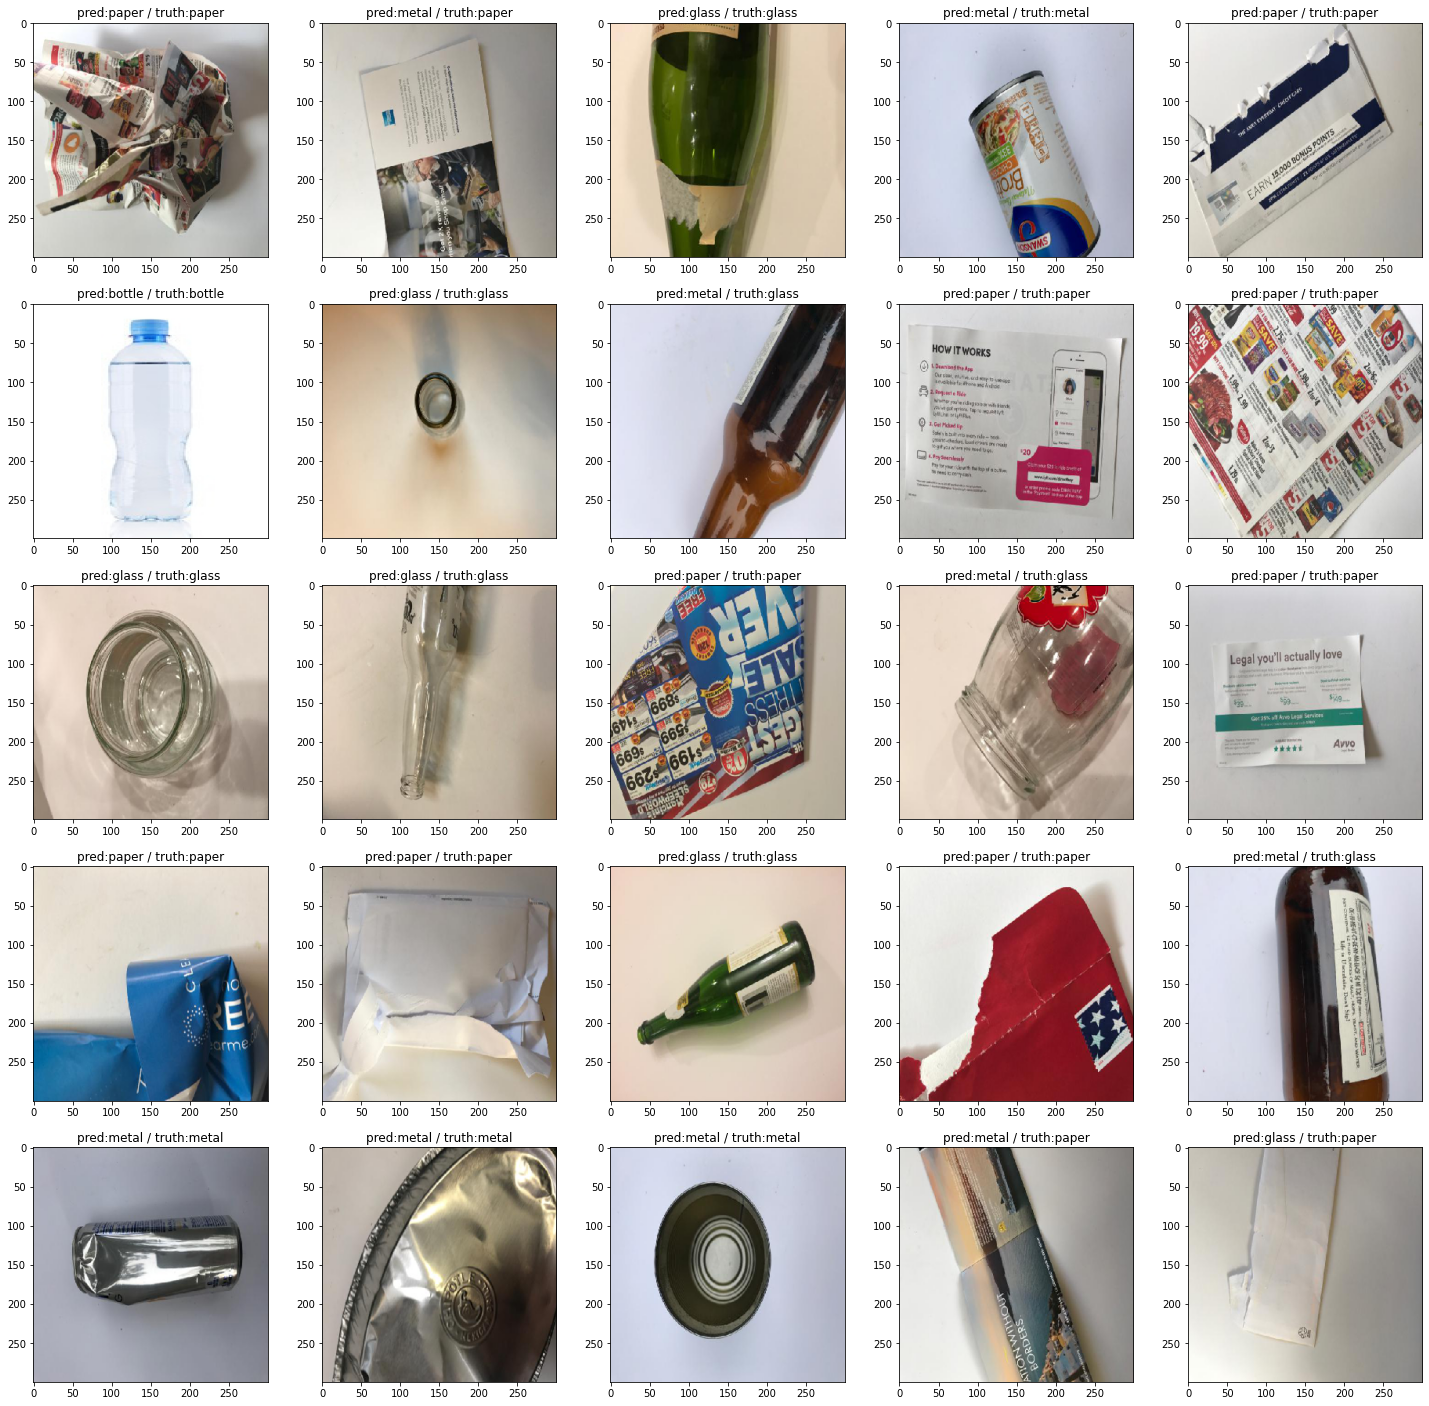

In [27]:
test_x, test_y = validation_generator.__getitem__(5)

preds = model.predict(test_x)

plt.figure(figsize=(25, 25))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])